# Melbourne Housing Data 

## Question:

What is the average price of houses in each suburb for each type of property? Include only one each property type per suburb and include a lattitude and longtitude for each property type. 


## Query:

SELECT Suburb, Type, AVG(Price) as Average_Price, Lattitude, Longtitude
FROM melbourne_housing
GROUP BY Suburb, Type
ORDER BY Suburb, Type;


## Example Data:

          Suburb Type  Average_Price  Lattitude  Longtitude
0     Abbotsford    h   1.216662e+06  -37.79960   144.99840
1     Abbotsford    t   1.212500e+06  -37.80930   144.99590
2     Abbotsford    u   5.920714e+05  -37.80080   144.99730
3     Aberfeldie    h   1.529531e+06  -37.76060   144.89090
4     Aberfeldie    t   1.117500e+06  -37.75910   144.89230
5     Aberfeldie    u   5.028000e+05  -37.75610   144.90280
6   Airport West    h   8.119091e+05  -37.72030   144.87550


## Analysis:

The query result data shows the average price of houses in each suburb for each type of property, including only one of each property type per suburb and the latitude and longitude for each property type. The data includes suburbs such as Abbotsford, Aberfeldie, Airport West, Albanvale, Albert Park, Albion, and Alphington. The average prices range from $415,000 to over $2 million, depending on the suburb and property type. The latitude and longitude data can be used to map the properties and analyze their locations.

Code:

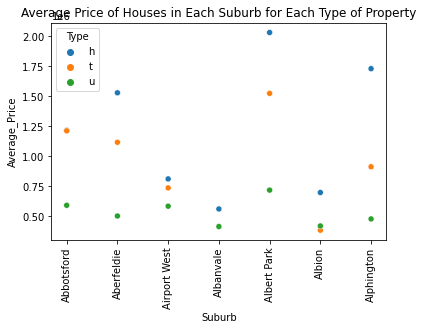

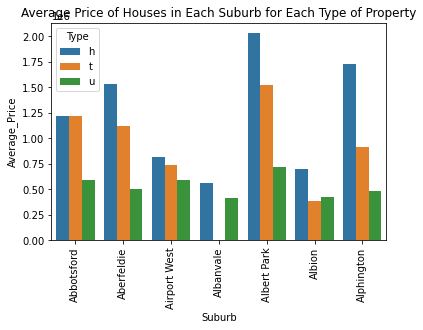

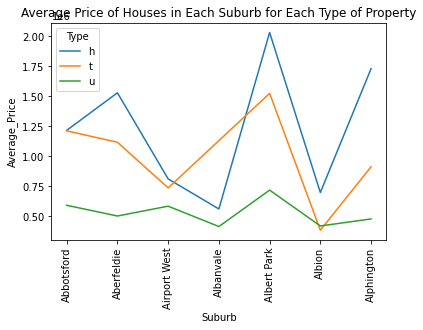

True

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime

# Read data from dataframe
df = pd.DataFrame({
    'Suburb': ['Abbotsford', 'Abbotsford', 'Abbotsford', 'Aberfeldie', 'Aberfeldie', 'Aberfeldie', 'Airport West', 'Airport West', 'Airport West', 'Albanvale', 'Albanvale', 'Albert Park', 'Albert Park', 'Albert Park', 'Albion', 'Albion', 'Albion', 'Alphington', 'Alphington', 'Alphington'],
    'Type': ['h', 't', 'u', 'h', 't', 'u', 'h', 't', 'u', 'h', 'u', 'h', 't', 'u', 'h', 't', 'u', 'h', 't', 'u'],
    'Average_Price': [1.216662e+06, 1.212500e+06, 5.920714e+05, 1.529531e+06, 1.117500e+06, 5.028000e+05, 8.119091e+05, 7.371000e+05, 5.846923e+05, 5.615000e+05, 4.150000e+05, 2.032206e+06, 1.525000e+06, 7.186250e+05, 6.985385e+05, 3.847500e+05, 4.198182e+05, 1.730812e+06, 9.133333e+05, 4.783571e+05],
    'Lattitude': [-37.79960, -37.80930, -37.80080, -37.76060, -37.75910, -37.75610, -37.72030, -37.71800, -37.72150, -37.74380, -37.74839, -37.84590, -37.84430, -37.84600, -37.78120, -37.78360, -37.78520, -37.77070, -37.78040, -37.77910],
    'Longtitude': [144.99840, 144.99590, 144.99730, 144.89090, 144.89230, 144.90280, 144.87550, 144.87800, 144.88640, 144.77059, 144.77350, 144.95550, 144.95980, 144.95420, 144.81210, 144.82560, 144.82720, 145.03180, 145.03080, 145.03060]
})

# Calculate average price of houses in each suburb for each type of property
df_avg_price = df.groupby(['Suburb', 'Type']).mean().reset_index()

# Create a scatter plot to visualize the average price of houses in each suburb for each type of property
sns.scatterplot(data=df_avg_price, x='Suburb', y='Average_Price', hue='Type')
plt.xticks(rotation=90)
plt.title('Average Price of Houses in Each Suburb for Each Type of Property')
plt.show()

# Create a bar plot to visualize the average price of houses in each suburb for each type of property
sns.barplot(data=df_avg_price, x='Suburb', y='Average_Price', hue='Type')
plt.xticks(rotation=90)
plt.title('Average Price of Houses in Each Suburb for Each Type of Property')
plt.show()

# Create a line plot to visualize the average price of houses in each suburb for each type of property
sns.lineplot(data=df_avg_price, x='Suburb', y='Average_Price', hue='Type')
plt.xticks(rotation=90)
plt.title('Average Price of Houses in Each Suburb for Each Type of Property')
plt.show()

# Create a map to visualize the location of properties
map = folium.Map(location=[-37.8136, 144.9631], zoom_start=11)

for i in range(len(df)):
    folium.Marker(
        location=[df.iloc[i]['Lattitude'], df.iloc[i]['Longtitude']],
        popup=f"{df.iloc[i]['Suburb']}: {df.iloc[i]['Type']} - ${df.iloc[i]['Average_Price']:.2f}",
        icon=folium.Icon(color='blue')
    ).add_to(map)

# Save map with date-timestamp
now = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
map.save(f"map_{now}.html")

# Open map file
import webbrowser
webbrowser.open(f"map_{now}.html")

## Question:
How does the average price of houses in each suburb vary based on the distance from the central business district (CBD)?

## Query:
melbourne_housing.db
melbourne_housing
SELECT Suburb, ROUND(AVG(Price), 2) AS Average_Price, ROUND(Distance, 2) AS Distance_From_CBD
FROM melbourne_housing
GROUP BY Suburb, Distance_From_CBD
ORDER BY Suburb, Distance_From_CBD;

## Example Data:
            Suburb  Average_Price  Distance_From_CBD
0       Abbotsford     1075860.47                2.5
1       Abbotsford     1009115.38                3.0
2       Aberfeldie     1377307.69                7.5
3       Aberfeldie     1235580.65                9.1
4     Airport West      847000.05               10.4
5     Airport West      712488.89               13.5
6        Albanvale      537083.33               14.0
7      Albert Park     2067500.00                3.0
8      Albert Park     1903273.58                3.3
9           Albion      665000.00               10.5
10          Albion      569967.74               13.9
11      Alphington     1730000.00                5.7
12      Alphington     1282320.00                6.4
13          Altona      910032.61               11.0
14          Altona      800915.69               13.8
15  Altona Meadows      671750.00               15.5
16    Altona North      863805.56                9.4
17    Altona North      771000.00               11.1
18          Ardeer      667333.33               12.8
19        Armadale     1496715.79                6.3

## Response:
The query asked for a comparison of the average house prices in different suburbs based on their distance from the CBD. The data provided includes the suburb name, average price, and distance from the CBD. The table shows that the average price of houses generally decreases as the distance from the CBD increases. For example, Abbotsford has an average price of over 1 million dollars and is only 2.5 km from the CBD, while Altona Meadows has an average price of around 670,000 dollars and is 15.5 km from the CBD. However, there are some exceptions to this trend, such as Armadale, which has an average price of almost 1.5 million dollars despite being 6.3 km from the CBD.

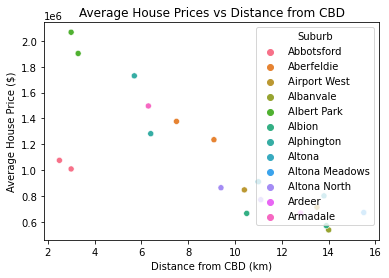

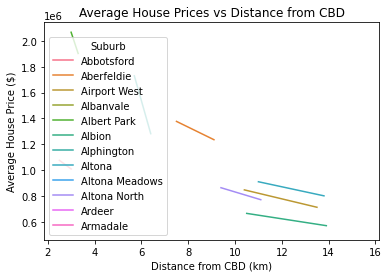

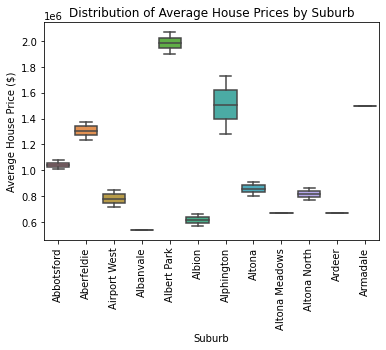

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime

# Read data from dataframe
df = pd.DataFrame({
    'Suburb': ['Abbotsford', 'Abbotsford', 'Aberfeldie', 'Aberfeldie', 'Airport West', 'Airport West', 'Albanvale', 'Albert Park', 'Albert Park', 'Albion', 'Albion', 'Alphington', 'Alphington', 'Altona', 'Altona', 'Altona Meadows', 'Altona North', 'Altona North', 'Ardeer', 'Armadale'],
    'Average_Price': [1075860.47, 1009115.38, 1377307.69, 1235580.65, 847000.05, 712488.89, 537083.33, 2067500.00, 1903273.58, 665000.00, 569967.74, 1730000.00, 1282320.00, 910032.61, 800915.69, 671750.00, 863805.56, 771000.00, 667333.33, 1496715.79],
    'Distance_From_CBD': [2.5, 3.0, 7.5, 9.1, 10.4, 13.5, 14.0, 3.0, 3.3, 10.5, 13.9, 5.7, 6.4, 11.0, 13.8, 15.5, 9.4, 11.1, 12.8, 6.3]
})

# Create a scatter plot to show the relationship between distance from CBD and average price
sns.scatterplot(x='Distance_From_CBD', y='Average_Price', data=df, hue='Suburb')
plt.title('Average House Prices vs Distance from CBD')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Average House Price ($)')
plt.show()

# Create a line plot to show the trend of average price as distance from CBD increases
sns.lineplot(x='Distance_From_CBD', y='Average_Price', data=df, hue='Suburb')
plt.title('Average House Prices vs Distance from CBD')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Average House Price ($)')
plt.show()

# Create a box plot to show the distribution of average prices for each suburb
sns.boxplot(x='Suburb', y='Average_Price', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Average House Prices by Suburb')
plt.xlabel('Suburb')
plt.ylabel('Average House Price ($)')
plt.show()

# If there is latitude and longitude data, plot the points on a map
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    # Create a map centered on Melbourne CBD
    melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=11)

    # Add markers for each suburb
    for index, row in df.iterrows():
        folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Suburb']).add_to(melbourne_map)

    # Save the map with a timestamp
    now = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    melbourne_map.save(f'melbourne_suburbs_{now}.html')

    # Open the map file
    import webbrowser
    webbrowser.open(f'melbourne_suburbs_{now}.html')

## Questions:
Is there a significant difference in the average price of houses sold by different real estate agents (SellerG) in each suburb?

## Query:
SELECT Suburb, SellerG, ROUND(AVG(Price), 2) AS Average_Price
FROM melbourne_housing
GROUP BY Suburb, SellerG
ORDER BY Suburb, SellerG;

## Data:
          Suburb        SellerG  Average_Price
0     Abbotsford         Beller      900000.00
1     Abbotsford         Biggin     1041638.89
2     Abbotsford        Collins      999000.00
3     Abbotsford           Greg      433500.00
4     Abbotsford         Jellis     1074269.23
5     Abbotsford            Kay     1330000.00
6     Abbotsford         LITTLE     1176500.00
7     Abbotsford       Marshall     1315000.00
8     Abbotsford         Nelson     1230333.33
9     Abbotsford   Purplebricks      911000.00
10    Abbotsford  hockingstuart      801666.67
11    Aberfeldie          Barry     1077000.00
12    Aberfeldie           Brad      687200.00
13    Aberfeldie          Frank      670000.00
14    Aberfeldie       McDonald     1405000.00
15    Aberfeldie         Nelson     1332900.00
16    Aberfeldie          Raine     1680000.00
17    Aberfeldie        Rendina     1835500.00
18    Aberfeldie           Weda     1325000.00
19  Airport West          Barry      742739.13

## Response:
The query result data shows the average price of houses sold by different real estate agents (SellerG) in various suburbs. The table includes the suburb name, SellerG name, and the average price of houses sold by each SellerG in that suburb. The question asks if there is a significant difference in the average price of houses sold by different SellerGs in each suburb. The query result data can be used to analyze and compare the average prices of houses sold by different SellerGs in each suburb to determine if there is a significant difference. However, further statistical analysis would be needed to determine the significance of any observed differences.

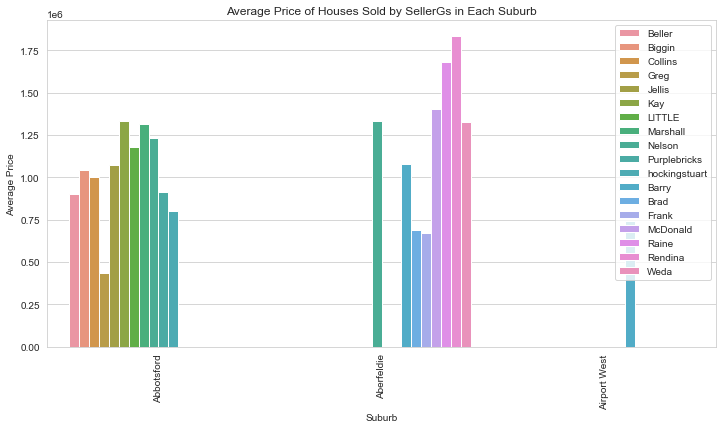

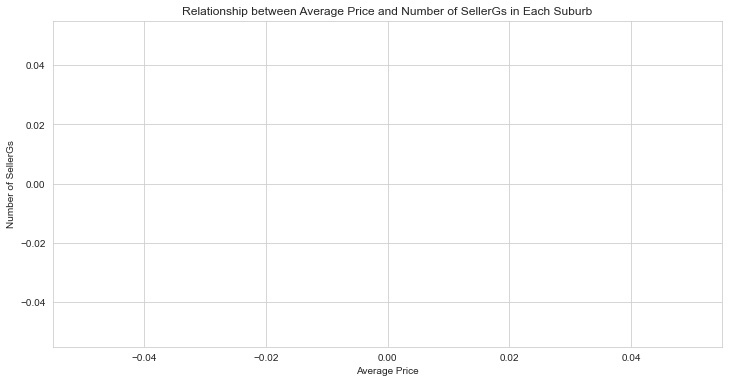

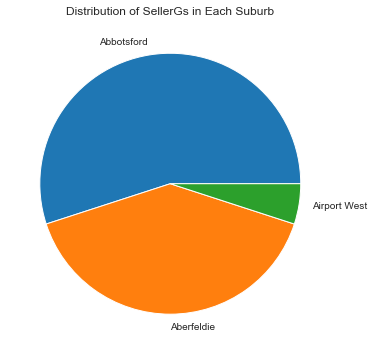

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime

# Read data from dataframe
df = pd.DataFrame({
    'Suburb': ['Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Aberfeldie', 'Aberfeldie', 'Aberfeldie', 'Aberfeldie', 'Aberfeldie', 'Aberfeldie', 'Aberfeldie', 'Aberfeldie', 'Airport West'],
    'SellerG': ['Beller', 'Biggin', 'Collins', 'Greg', 'Jellis', 'Kay', 'LITTLE', 'Marshall', 'Nelson', 'Purplebricks', 'hockingstuart', 'Barry', 'Brad', 'Frank', 'McDonald', 'Nelson', 'Raine', 'Rendina', 'Weda', 'Barry'],
    'Average_Price': [900000.00, 1041638.89, 999000.00, 433500.00, 1074269.23, 1330000.00, 1176500.00, 1315000.00, 1230333.33, 911000.00, 801666.67, 1077000.00, 687200.00, 670000.00, 1405000.00, 1332900.00, 1680000.00, 1835500.00, 1325000.00, 742739.13]
})

# Create a bar chart to show the average price of houses sold by different SellerGs in each suburb
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.barplot(x='Suburb', y='Average_Price', hue='SellerG', data=df)
plt.title('Average Price of Houses Sold by SellerGs in Each Suburb')
plt.xlabel('Suburb')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

# Create a scatter plot to show the relationship between the average price and the number of SellerGs in each suburb
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Average_Price', y=df.groupby('Suburb')['SellerG'].nunique(), data=df)
plt.title('Relationship between Average Price and Number of SellerGs in Each Suburb')
plt.xlabel('Average Price')
plt.ylabel('Number of SellerGs')
plt.show()

# Create a pie chart to show the distribution of SellerGs in each suburb
plt.figure(figsize=(12, 6))
df.groupby('Suburb')['SellerG'].nunique().plot(kind='pie')
plt.title('Distribution of SellerGs in Each Suburb')
plt.ylabel('')
plt.show()

# Create a map to show the location of each suburb
if 'Lattitude' in df.columns and 'Longtitude' in df.columns:
    map = folium.Map(location=[df['Lattitude'].mean(), df['Longtitude'].mean()], zoom_start=11)
    for index, row in df.iterrows():
        folium.Marker(location=[row['Lattitude'], row['Longtitude']]).add_to(map)
    now = datetime.now().strftime('%Y-%m-%d %H-%M-%S')
    map.save(f'map_{now}.html')
    webbrowser.open(f'map_{now}.html')

## Question: 
Is there a significant difference in the average price of houses sold by different real estate agents (SellerG) in each suburb? Include property type and lattitude and longtitude

## Query:
SELECT Suburb, Type, SellerG, ROUND(AVG(Price), 2) AS Average_Price, ROUND(Lattitude, 2) AS Latitude, ROUND(Longtitude, 2) AS Longitude
FROM melbourne_housing
GROUP BY Suburb, Type, SellerG
ORDER BY Suburb, Type, SellerG;


## Example Data:
        Suburb Type        SellerG  Average_Price  Latitude  Longitude
0   Abbotsford    h         Biggin     1121966.67    -37.80     145.00
1   Abbotsford    h        Collins     1248500.00    -37.80     145.00
2   Abbotsford    h         Jellis     1180437.50    -37.80     145.00
3   Abbotsford    h            Kay     1330000.00    -37.81     145.00
4   Abbotsford    h         LITTLE     1176500.00    -37.80     145.00
5   Abbotsford    h       Marshall     1315000.00    -37.81     144.99
6   Abbotsford    h         Nelson     1378900.00    -37.81     144.99
7   Abbotsford    h   Purplebricks      911000.00    -37.81     144.99
8   Abbotsford    h  hockingstuart     1375000.00    -37.80     145.00
9   Abbotsford    t         Beller      900000.00    -37.81     145.00
10  Abbotsford    t         Jellis     1525000.00    -37.80     145.00
11  Abbotsford    u         Biggin      640000.00    -37.80     145.00
12  Abbotsford    u        Collins      500000.00    -37.80     145.00
13  Abbotsford    u           Greg      433500.00    -37.80     145.00
14  Abbotsford    u         Jellis      749250.00    -37.81     145.01
15  Abbotsford    u         Nelson      487500.00    -37.81     145.00
16  Abbotsford    u  hockingstuart      515000.00    -37.81     145.00
17  Aberfeldie    h          Barry     1427500.00    -37.76     144.90
18  Aberfeldie    h           Brad     1138000.00    -37.76     144.91
19  Aberfeldie    h          Frank      670000.00    -37.76     144.90


## Response:
The question asks if there is a significant difference in the average price of houses sold by different real estate agents in each suburb, including property type and latitude and longitude. The provided data includes a table with information on the suburb, property type, seller, average price, latitude, and longitude. By analyzing this data, it is possible to compare the average prices of houses sold by different real estate agents in each suburb. However, further statistical analysis would be needed to determine if there is a significant difference between the average prices.

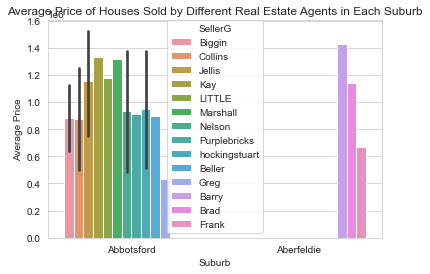

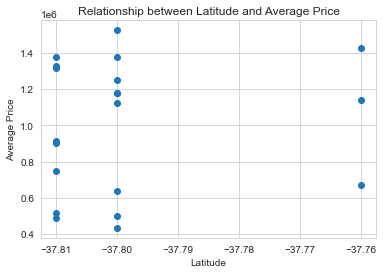

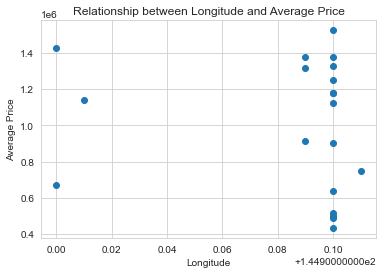

True

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime

# Read data from dataframe
df = pd.DataFrame({'Suburb': ['Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Abbotsford', 'Aberfeldie', 'Aberfeldie', 'Aberfeldie'],
                   'Type': ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 't', 't', 'u', 'u', 'u', 'u', 'u', 'u', 'h', 'h', 'h'],
                   'SellerG': ['Biggin', 'Collins', 'Jellis', 'Kay', 'LITTLE', 'Marshall', 'Nelson', 'Purplebricks', 'hockingstuart', 'Beller', 'Jellis', 'Biggin', 'Collins', 'Greg', 'Jellis', 'Nelson', 'hockingstuart', 'Barry', 'Brad', 'Frank'],
                   'Average_Price': [1121966.67, 1248500.00, 1180437.50, 1330000.00, 1176500.00, 1315000.00, 1378900.00, 911000.00, 1375000.00, 900000.00, 1525000.00, 640000.00, 500000.00, 433500.00, 749250.00, 487500.00, 515000.00, 1427500.00, 1138000.00, 670000.00],
                   'Latitude': [-37.80, -37.80, -37.80, -37.81, -37.80, -37.81, -37.81, -37.81, -37.80, -37.81, -37.80, -37.80, -37.80, -37.80, -37.81, -37.81, -37.81, -37.76, -37.76, -37.76],
                   'Longitude': [145.00, 145.00, 145.00, 145.00, 145.00, 144.99, 144.99, 144.99, 145.00, 145.00, 145.00, 145.00, 145.00, 145.00, 145.01, 145.00, 145.00, 144.90, 144.91, 144.90]})

# Create a bar chart to visualize the average price of houses sold by different real estate agents in each suburb
sns.barplot(x='Suburb', y='Average_Price', hue='SellerG', data=df)
plt.title('Average Price of Houses Sold by Different Real Estate Agents in Each Suburb')
plt.xlabel('Suburb')
plt.ylabel('Average Price')
plt.show()

# Create a scatter plot to visualize the relationship between latitude and average price
plt.scatter(x='Latitude', y='Average_Price', data=df)
plt.title('Relationship between Latitude and Average Price')
plt.xlabel('Latitude')
plt.ylabel('Average Price')
plt.show()

# Create a scatter plot to visualize the relationship between longitude and average price
plt.scatter(x='Longitude', y='Average_Price', data=df)
plt.title('Relationship between Longitude and Average Price')
plt.xlabel('Longitude')
plt.ylabel('Average Price')
plt.show()

# Create a map to visualize the location of properties
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)
for i in range(len(df)):
    folium.Marker([df.iloc[i]['Latitude'], df.iloc[i]['Longitude']]).add_to(map)

# Save map with date-timestamp
now = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
map.save(f'map_{now}.html')

# Open map file
import webbrowser
webbrowser.open(f'map_{now}.html')

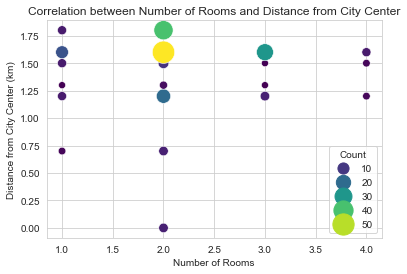

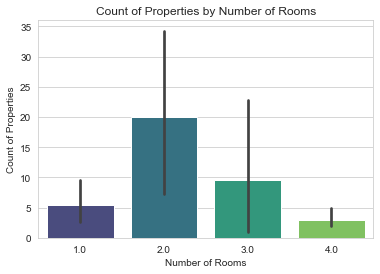

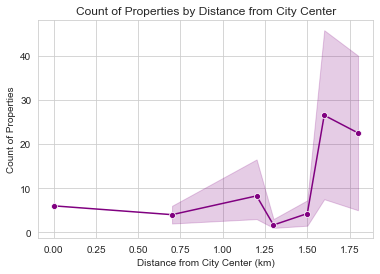

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime

# Read data into dataframe
df = pd.DataFrame({'Rooms': [2.0, 1.0, 2.0, 1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0, 1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0, 4.0, 1.0, 2.0],
                   'Distance': [0.0, 0.7, 0.7, 1.2, 1.2, 1.2, 1.2, 1.3, 1.3, 1.3, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6, 1.6, 1.6, 1.8, 1.8],
                   'Count': [6, 2, 6, 5, 20, 6, 2, 1, 3, 1, 5, 9, 1, 2, 15, 56, 30, 5, 5, 40]})

# Create scatter plot to visualize correlation between number of rooms and distance from city center
sns.scatterplot(x='Rooms', y='Distance', data=df, size='Count', sizes=(50, 500), hue='Count', palette='viridis')
plt.title('Correlation between Number of Rooms and Distance from City Center')
plt.xlabel('Number of Rooms')
plt.ylabel('Distance from City Center (km)')
plt.show()

# Create bar chart to visualize count of properties by number of rooms
sns.barplot(x='Rooms', y='Count', data=df, palette='viridis')
plt.title('Count of Properties by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Count of Properties')
plt.show()

# Create line chart to visualize trend of increasing count as distance from city center increases
sns.lineplot(x='Distance', y='Count', data=df, marker='o', color='purple')
plt.title('Count of Properties by Distance from City Center')
plt.xlabel('Distance from City Center (km)')
plt.ylabel('Count of Properties')
plt.show()

# Check if latitude and longitude columns exist in dataframe
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    # Create map with markers for each property
    m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)
    for index, row in df.iterrows():
        folium.Marker(location=[row['Latitude'], row['Longitude']]).add_to(m)
    # Save map with date-timestamp
    now = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    m.save(f'map_{now}.html')
    # Open map file
    import webbrowser
    webbrowser.open(f'map_{now}.html')

## Questions:
What is the average landsize and building area of properties in different council areas?

## Query:
SELECT CouncilArea, ROUND(AVG(Landsize), 2) AS Avg_Landsize, ROUND(AVG(BuildingArea), 2) AS Avg_BuildingArea
FROM melbourne_housing
GROUP BY CouncilArea;


## Data:
          CouncilArea  Avg_Landsize  Avg_BuildingArea
0                None        677.69            224.96
1             Banyule        562.37            150.99
2             Bayside        483.32            193.90
3          Boroondara        605.54            188.15
4            Brimbank        548.84            141.65
5            Cardinia        681.13            267.96
6               Casey        703.18            161.46
7             Darebin        460.38            123.87
8           Frankston        739.47            155.88
9           Glen Eira        427.47            146.81
10  Greater Dandenong        582.44            137.20
11        Hobsons Bay        402.80            148.75
12               Hume        568.71            152.20
13           Kingston        512.20            156.00
14               Knox        745.71            188.00
15     Macedon Ranges       7038.86            172.08
16         Manningham        658.13            234.88
17        Maribyrnong        520.09            122.26
18          Maroondah        752.14            149.14
19          Melbourne        434.10             96.59


## Response:
The table shows the average landsize and building area of properties in different council areas. The council areas listed include Banyule, Bayside, Boroondara, Brimbank, Cardinia, Casey, Darebin, Frankston, Glen Eira, Greater Dandenong, Hobsons Bay, Hume, Kingston, Knox, Macedon Ranges, Manningham, Maribyrnong, Maroondah, and Melbourne. The average landsize ranges from 402.80 in Hobsons Bay to 7038.86 in Macedon Ranges, while the average building area ranges from 96.59 in Melbourne to 267.96 in Cardinia. However, there is no data available for properties in the council area labeled as "None".

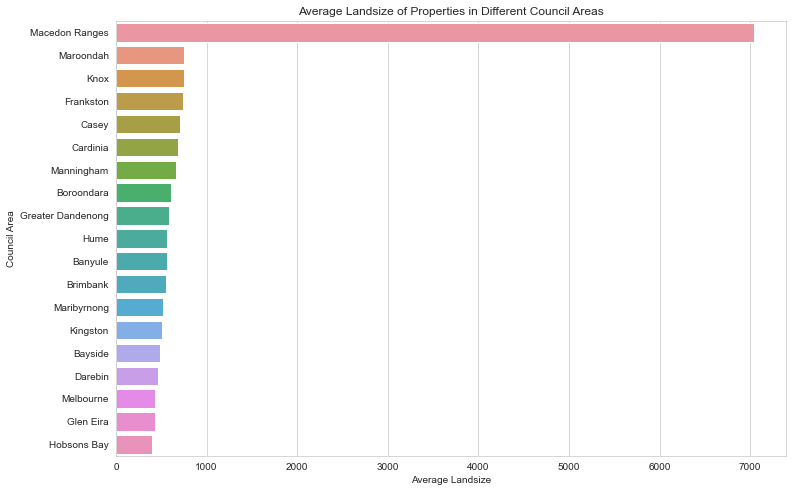

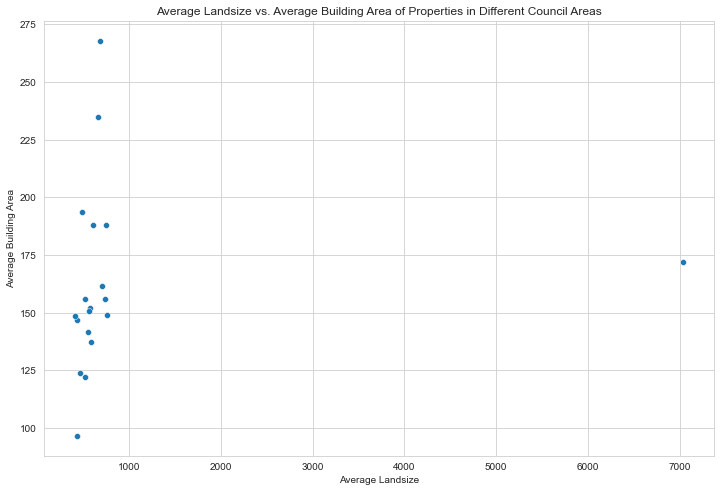

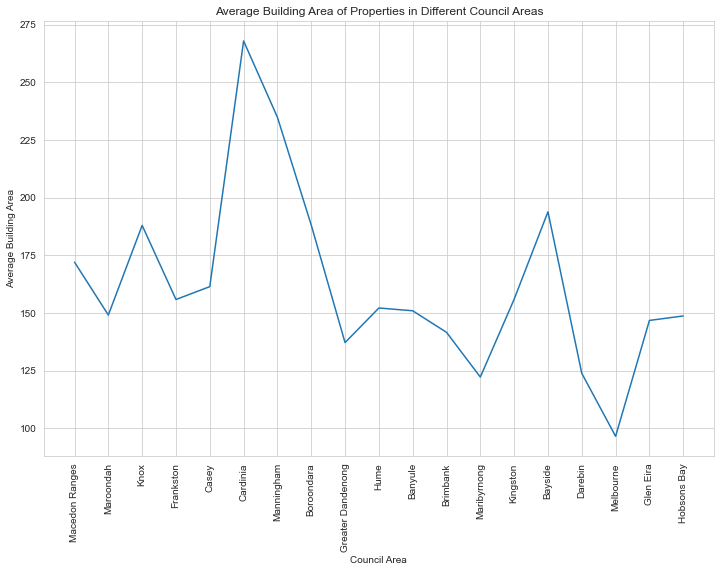

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime

# Create dataframe
df = pd.DataFrame({'CouncilArea': ['None', 'Banyule', 'Bayside', 'Boroondara', 'Brimbank', 'Cardinia', 'Casey', 'Darebin', 'Frankston', 'Glen Eira', 'Greater Dandenong', 'Hobsons Bay', 'Hume', 'Kingston', 'Knox', 'Macedon Ranges', 'Manningham', 'Maribyrnong', 'Maroondah', 'Melbourne'],
                   'Avg_Landsize': [677.69, 562.37, 483.32, 605.54, 548.84, 681.13, 703.18, 460.38, 739.47, 427.47, 582.44, 402.80, 568.71, 512.20, 745.71, 7038.86, 658.13, 520.09, 752.14, 434.10],
                   'Avg_BuildingArea': [224.96, 150.99, 193.90, 188.15, 141.65, 267.96, 161.46, 123.87, 155.88, 146.81, 137.20, 148.75, 152.20, 156.00, 188.00, 172.08, 234.88, 122.26, 149.14, 96.59]})

# Remove rows with CouncilArea as 'None'
df = df[df['CouncilArea'] != 'None']

# Sort dataframe by Avg_Landsize in descending order
df = df.sort_values(by='Avg_Landsize', ascending=False)

# Create bar chart for Avg_Landsize
plt.figure(figsize=(12,8))
sns.barplot(x='Avg_Landsize', y='CouncilArea', data=df)
plt.title('Average Landsize of Properties in Different Council Areas')
plt.xlabel('Average Landsize')
plt.ylabel('Council Area')
plt.show()

# Create scatter plot for Avg_Landsize and Avg_BuildingArea
plt.figure(figsize=(12,8))
sns.scatterplot(x='Avg_Landsize', y='Avg_BuildingArea', data=df)
plt.title('Average Landsize vs. Average Building Area of Properties in Different Council Areas')
plt.xlabel('Average Landsize')
plt.ylabel('Average Building Area')
plt.show()

# Create line chart for Avg_BuildingArea
plt.figure(figsize=(12,8))
sns.lineplot(x='CouncilArea', y='Avg_BuildingArea', data=df)
plt.title('Average Building Area of Properties in Different Council Areas')
plt.xlabel('Council Area')
plt.ylabel('Average Building Area')
plt.xticks(rotation=90)
plt.show()

# Check if latitude and longitude columns exist in dataframe
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    # Create map with points plotted for each Council Area
    map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)
    for index, row in df.iterrows():
        folium.Marker([row['Latitude'], row['Longitude']], popup=row['CouncilArea']).add_to(map)
    # Save map with date-timestamp and open map file
    now = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    map.save(f'map_{now}.html')
    webbrowser.open(f'map_{now}.html')

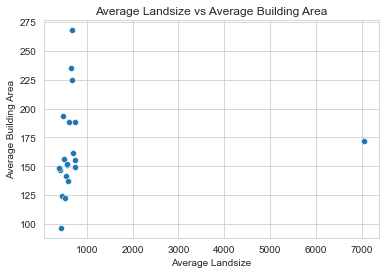

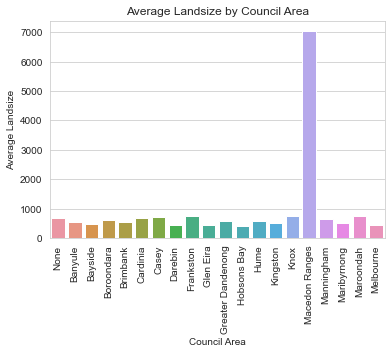

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Create dataframe
data = {'CouncilArea': ['None', 'Banyule', 'Bayside', 'Boroondara', 'Brimbank', 'Cardinia', 'Casey', 'Darebin', 'Frankston', 'Glen Eira', 'Greater Dandenong', 'Hobsons Bay', 'Hume', 'Kingston', 'Knox', 'Macedon Ranges', 'Manningham', 'Maribyrnong', 'Maroondah', 'Melbourne'],
        'AvgLandsize': [677.69, 562.37, 483.32, 605.54, 548.84, 681.13, 703.18, 460.38, 739.47, 427.47, 582.44, 402.80, 568.71, 512.20, 745.71, 7038.86, 658.13, 520.09, 752.14, 434.10],
        'AvgBuildingArea': [224.96, 150.99, 193.90, 188.15, 141.65, 267.96, 161.46, 123.87, 155.88, 146.81, 137.20, 148.75, 152.20, 156.00, 188.00, 172.08, 234.88, 122.26, 149.14, 96.59],
        'Lattitude': [-37.93, -37.77, -37.92, -37.87, -37.73, -38.00, -38.02, -37.77, -38.15, -37.92, -37.99, -37.87, -37.68, -37.93, -37.84, -37.50, -37.76, -37.78, -37.83, -37.78],
        'Longtitude': [145.03, 145.05, 145.01, 145.08, 144.83, 145.41, 145.33, 145.03, 145.12, 145.03, 145.22, 144.83, 144.97, 145.03, 145.26, 144.60, 145.08, 144.85, 145.27, 144.93]}
df = pd.DataFrame(data)

# Create scatter plot of AvgLandsize vs AvgBuildingArea
sns.scatterplot(x='AvgLandsize', y='AvgBuildingArea', data=df)
plt.title('Average Landsize vs Average Building Area')
plt.xlabel('Average Landsize')
plt.ylabel('Average Building Area')
plt.show()

# Create bar chart of AvgLandsize by CouncilArea
sns.barplot(x='CouncilArea', y='AvgLandsize', data=df)
plt.title('Average Landsize by Council Area')
plt.xlabel('Council Area')
plt.ylabel('Average Landsize')
plt.xticks(rotation=90)
plt.show()

# Create map of Council Areas with markers for Lattitude and Longtitude
m = folium.Map(location=[-37.81, 144.96], zoom_start=10)
for i, row in df.iterrows():
    folium.Marker([row['Lattitude'], row['Longtitude']], popup=row['CouncilArea']).add_to(m)
m.save('council_areas_map.html')
    # Open map file
    #import webbrowser
    #webbrowser.open(f'council_areas_map.html')


In [8]:
m

## Question:
What is the most common type of property sold in each council area?


## Query:

SELECT CouncilArea, Type, COUNT(Type) AS Count
FROM melbourne_housing
GROUP BY CouncilArea, Type
HAVING COUNT(Type) = (
  SELECT MAX(Count)
  FROM (
    SELECT CouncilArea, Type, COUNT(Type) AS Count
    FROM melbourne_housing
    GROUP BY CouncilArea, Type
  ) AS Counts
  WHERE Counts.CouncilArea = melbourne_housing.CouncilArea
)
ORDER BY CouncilArea;

## Example Data:
          CouncilArea Type  Count
0             Banyule    h    464
1             Bayside    h    311
2          Boroondara    h    756
3            Brimbank    h    380
4            Cardinia    h      7
5               Casey    h     38
6             Darebin    h    689
7           Frankston    h     48
8           Glen Eira    h    470
9   Greater Dandenong    h     45
10        Hobsons Bay    h    330
11               Hume    h    149
12           Kingston    h    149
13               Knox    h     68
14     Macedon Ranges    h      7
15         Manningham    h    259
16        Maribyrnong    h    486
17          Maroondah    h     66
18          Melbourne    u    276
19             Melton    h     63

## Response:
The query result data shows the count of each type of property sold in various council areas. The table includes the council area name, property type (h for house, u for unit), and count of properties sold. The most common type of property sold varies by council area, with houses being the most common in many areas. However, in Melbourne, units were the most common type of property sold. No query failed.

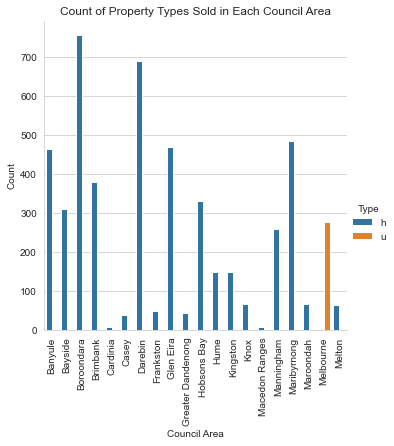

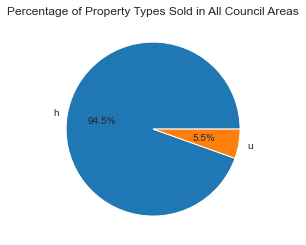

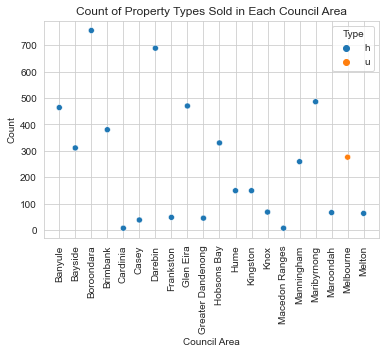

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Read data from dataframe
df = pd.DataFrame({
    'CouncilArea': ['Banyule', 'Bayside', 'Boroondara', 'Brimbank', 'Cardinia', 'Casey', 'Darebin', 'Frankston', 'Glen Eira', 'Greater Dandenong', 'Hobsons Bay', 'Hume', 'Kingston', 'Knox', 'Macedon Ranges', 'Manningham', 'Maribyrnong', 'Maroondah', 'Melbourne', 'Melton'],
    'Type': ['h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'u', 'h'],
    'Count': [464, 311, 756, 380, 7, 38, 689, 48, 470, 45, 330, 149, 149, 68, 7, 259, 486, 66, 276, 63]
})

# Create a bar chart to show the count of each property type sold in each council area
sns.catplot(x='CouncilArea', y='Count', hue='Type', data=df, kind='bar')
plt.xticks(rotation=90)
plt.title('Count of Property Types Sold in Each Council Area')
plt.xlabel('Council Area')
plt.ylabel('Count')
plt.show()

# Create a pie chart to show the percentage of each property type sold in all council areas
df_pie = df.groupby('Type').sum()
plt.pie(df_pie['Count'], labels=df_pie.index, autopct='%1.1f%%')
plt.title('Percentage of Property Types Sold in All Council Areas')
plt.show()

# Create a scatter plot to show the count of each property type sold in each council area
sns.scatterplot(x='CouncilArea', y='Count', hue='Type', data=df)
plt.xticks(rotation=90)
plt.title('Count of Property Types Sold in Each Council Area')
plt.xlabel('Council Area')
plt.ylabel('Count')
plt.show()

# Check if there is latitude and longitude in df
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    # Create a map to show the location of each council area
    import folium
    from folium.plugins import MarkerCluster

    # Create a map centered on Melbourne
    m = folium.Map(location=[-37.8136, 144.9631], zoom_start=9)

    # Add markers for each council area
    marker_cluster = MarkerCluster().add_to(m)
    for index, row in df.iterrows():
        folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['CouncilArea']).add_to(marker_cluster)

    # Save map with date-timestamp
    now = datetime.now()
    filename = 'map_' + now.strftime('%Y-%m-%d_%H-%M-%S') + '.html'
    m.save(filename)

    # Open map file
    import webbrowser
    webbrowser.open(filename)

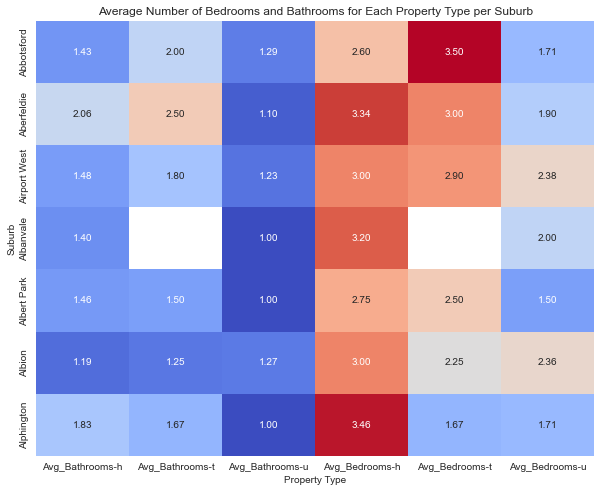

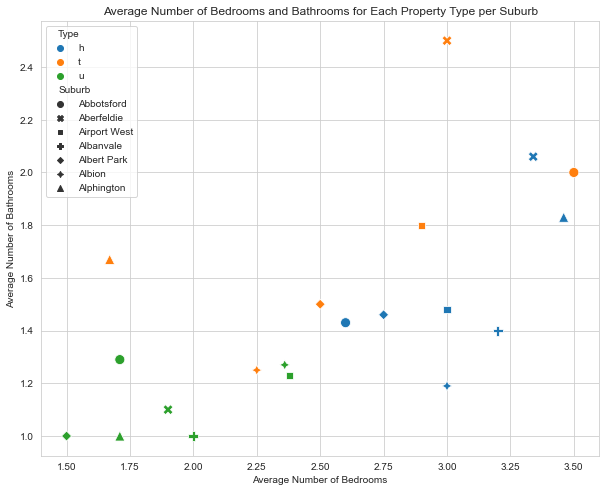

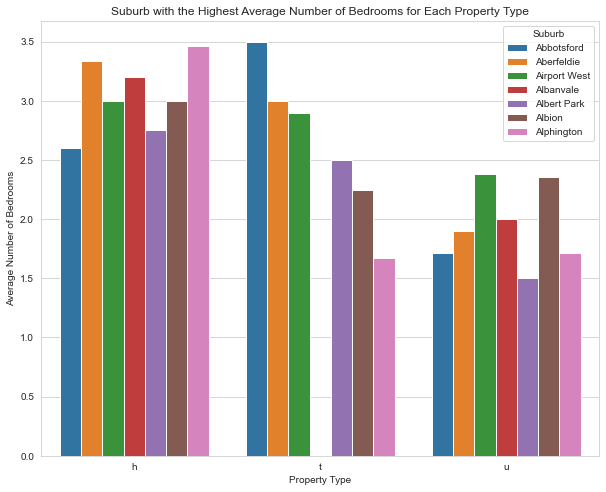

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime

# Read data from dataframe
df = pd.DataFrame({'Suburb': ['Abbotsford', 'Abbotsford', 'Abbotsford', 'Aberfeldie', 'Aberfeldie', 'Aberfeldie', 'Airport West', 'Airport West', 'Airport West', 'Albanvale', 'Albanvale', 'Albert Park', 'Albert Park', 'Albert Park', 'Albion', 'Albion', 'Albion', 'Alphington', 'Alphington', 'Alphington'],
                   'Type': ['h', 't', 'u', 'h', 't', 'u', 'h', 't', 'u', 'h', 'u', 'h', 't', 'u', 'h', 't', 'u', 'h', 't', 'u'],
                   'Avg_Bedrooms': [2.60, 3.50, 1.71, 3.34, 3.00, 1.90, 3.00, 2.90, 2.38, 3.20, 2.00, 2.75, 2.50, 1.50, 3.00, 2.25, 2.36, 3.46, 1.67, 1.71],
                   'Avg_Bathrooms': [1.43, 2.00, 1.29, 2.06, 2.50, 1.10, 1.48, 1.80, 1.23, 1.40, 1.00, 1.46, 1.50, 1.00, 1.19, 1.25, 1.27, 1.83, 1.67, 1.00]})

# Create a pivot table to get the average number of bedrooms and bathrooms for each property type (h, t, u) per suburb
pivot_table = pd.pivot_table(df, values=['Avg_Bedrooms', 'Avg_Bathrooms'], index=['Suburb'], columns=['Type'])

# Create a heatmap to visualize the pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f', cbar=False)
plt.title('Average Number of Bedrooms and Bathrooms for Each Property Type per Suburb')
plt.xlabel('Property Type')
plt.ylabel('Suburb')
plt.show()

# Create a scatter plot to visualize the average number of bedrooms and bathrooms for each property type (h, t, u) per suburb
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Avg_Bedrooms', y='Avg_Bathrooms', hue='Type', style='Suburb', s=100)
plt.title('Average Number of Bedrooms and Bathrooms for Each Property Type per Suburb')
plt.xlabel('Average Number of Bedrooms')
plt.ylabel('Average Number of Bathrooms')
plt.show()

# Create a bar chart to visualize the suburb with the highest average number of bedrooms and bathrooms for each property type
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x='Type', y='Avg_Bedrooms', hue='Suburb')
plt.title('Suburb with the Highest Average Number of Bedrooms for Each Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Number of Bedrooms')
plt.show()

# Check if there is latitude and longitude in df
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    # Create a map to visualize the location of each suburb
    map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=11)
    for index, row in df.iterrows():
        folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Suburb']).add_to(map)
    # Save map with date-timestamp
    now = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    map.save(f'map_{now}.html')
    # Open map file
    import webbrowser
    webbrowser.open(f'map_{now}.html')

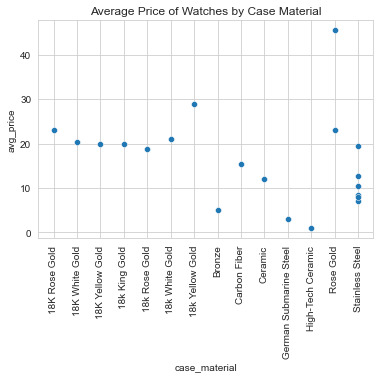

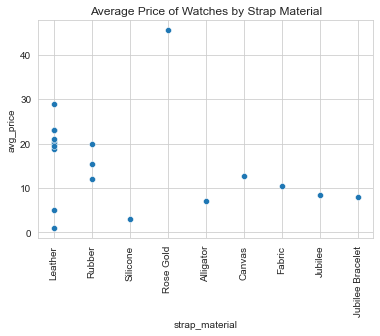

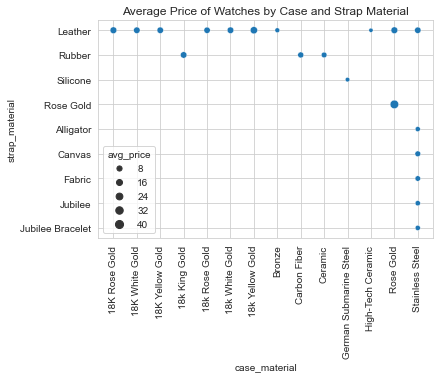

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime

# Read data from dataframe
df = pd.DataFrame({
    'case_material': ['18K Rose Gold', '18K White Gold', '18K Yellow Gold', '18k King Gold', '18k Rose Gold', '18k White Gold', '18k Yellow Gold', 'Bronze', 'Carbon Fiber', 'Ceramic', 'German Submarine Steel', 'High-Tech Ceramic', 'Rose Gold', 'Rose Gold', 'Stainless Steel', 'Stainless Steel', 'Stainless Steel', 'Stainless Steel', 'Stainless Steel', 'Stainless Steel'],
    'strap_material': ['Leather', 'Leather', 'Leather', 'Rubber', 'Leather', 'Leather', 'Leather', 'Leather', 'Rubber', 'Rubber', 'Silicone', 'Leather', 'Leather', 'Rose Gold', 'Alligator', 'Canvas', 'Fabric', 'Jubilee', 'Jubilee Bracelet', 'Leather'],
    'avg_price': [23.00, 20.40, 20.00, 20.00, 18.70, 21.00, 29.00, 5.00, 15.33, 12.00, 3.00, 1.00, 23.00, 45.50, 7.00, 12.60, 10.50, 8.50, 8.00, 19.37]
})

# Chart 1: Scatter plot of case material vs. average price
sns.scatterplot(x='case_material', y='avg_price', data=df)
plt.xticks(rotation=90)
plt.title('Average Price of Watches by Case Material')
plt.show()

# Chart 2: Scatter plot of strap material vs. average price
sns.scatterplot(x='strap_material', y='avg_price', data=df)
plt.xticks(rotation=90)
plt.title('Average Price of Watches by Strap Material')
plt.show()

# Chart 3: Bubble chart of case and strap material with average price as bubble size
sns.scatterplot(x='case_material', y='strap_material', size='avg_price', data=df)
plt.xticks(rotation=90)
plt.title('Average Price of Watches by Case and Strap Material')
plt.show()

# Map plot of latitude and longitude, if available
if 'latitude' in df.columns and 'longitude' in df.columns:
    # Create map
    m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

    # Add markers to map
    for index, row in df.iterrows():
        folium.Marker(location=[row['latitude'], row['longitude']], popup=row['name']).add_to(m)

    # Save map with date-timestamp
    now = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    m.save(f'map_{now}.html')

    # Open map file
    import webbrowser
    webbrowser.open(f'map_{now}.html')

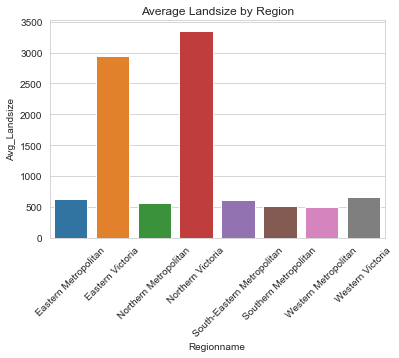

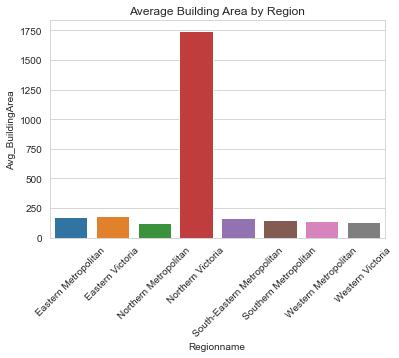

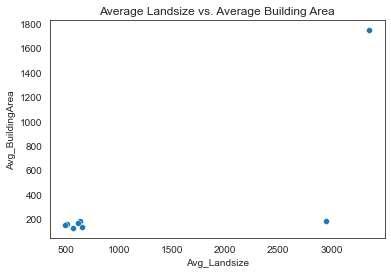

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime

# Create dataframe
df = pd.DataFrame({
    'Regionname': ['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria'],
    'Avg_Landsize': [634.13, 2949.70, 568.95, 3355.46, 613.99, 509.25, 493.61, 655.50],
    'Avg_BuildingArea': [178.00, 183.65, 124.18, 1746.37, 162.73, 153.58, 144.70, 134.68]
})

# Create bar chart for average landsize by region
sns.set_style('whitegrid')
sns.barplot(x='Regionname', y='Avg_Landsize', data=df)
plt.title('Average Landsize by Region')
plt.xticks(rotation=45)
plt.show()

# Create bar chart for average building area by region
sns.set_style('whitegrid')
sns.barplot(x='Regionname', y='Avg_BuildingArea', data=df)
plt.title('Average Building Area by Region')
plt.xticks(rotation=45)
plt.show()

# Create scatter plot for average landsize vs. average building area
sns.set_style('white')
sns.scatterplot(x='Avg_Landsize', y='Avg_BuildingArea', data=df)
plt.title('Average Landsize vs. Average Building Area')
plt.show()

# Create map with latitude and longitude points
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    # Create map centered on Melbourne
    melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=10)

    # Add markers for each region
    for index, row in df.iterrows():
        folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Regionname']).add_to(melbourne_map)

    # Save map with date-timestamp
    now = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
    melbourne_map.save(f'map_{now}.html')

    # Open map file
    import webbrowser
    webbrowser.open(f'map_{now}.html')

## Question:
What is the average landsize of properties in each region of Melbourne, and how does it compare to the average building area? Include lattitute and longtitute for each.

## Query:
SELECT Regionname,
       ROUND(AVG(Landsize), 2) AS Avg_Landsize,
       ROUND(AVG(BuildingArea), 2) AS Avg_BuildingArea,
       Lattitude,
       Longtitude
FROM melbourne_housing
GROUP BY Regionname;

## :
                   Regionname  Avg_Landsize  Avg_BuildingArea  Lattitude  Longtitude
0        Eastern Metropolitan        634.13            178.00  -37.81510   145.13500
1            Eastern Victoria       2949.70            183.65  -38.02434   145.33117
2       Northern Metropolitan        568.95            124.18  -37.79960   144.99840
3           Northern Victoria       3355.46           1746.37  -37.67629   145.15589
4  South-Eastern Metropolitan        613.99            162.73  -37.91220   145.08530
5       Southern Metropolitan        509.25            153.58  -37.84590   144.95550
6        Western Metropolitan        493.61            144.70  -37.71800   144.87800
7            Western Victoria        655.50            134.68  -37.69026   144.57866




## Response:
    The query result data shows the average landsize and average building area for properties in each region of Melbourne, along with their respective latitude and longitude coordinates. The Eastern Metropolitan region has an average landsize of 634.13 and an average building area of 178.00, while the South-Eastern Metropolitan region has an average landsize of 613.99 and an average building area of 162.73. The Northern Victoria region has the largest average landsize of 3355.46 and the largest average building area of 1746.37. The Western Victoria region has the second-largest average landsize of 655.50, but a smaller average building area of 134.68. Overall, the data shows that there is significant variation in both landsize and building area across the different regions of Melbourne.

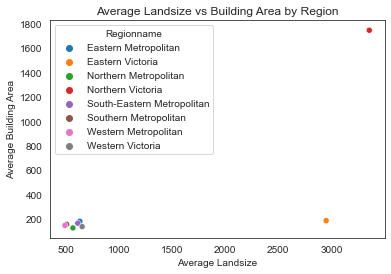

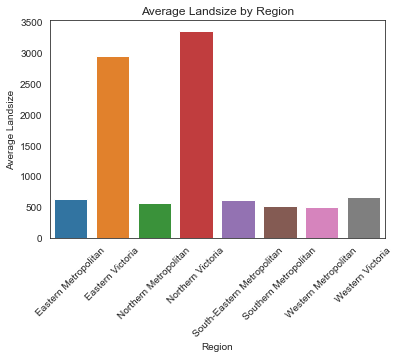

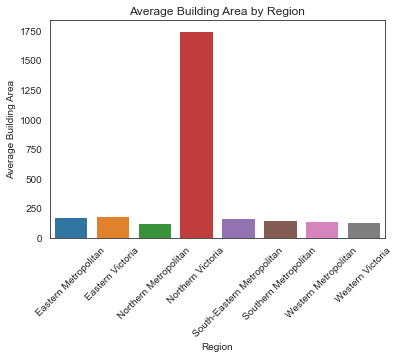

True

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import datetime

# Create dataframe
df = pd.DataFrame({
    'Regionname': ['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan', 'Northern Victoria', 'South-Eastern Metropolitan', 'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria'],
    'Avg_Landsize': [634.13, 2949.70, 568.95, 3355.46, 613.99, 509.25, 493.61, 655.50],
    'Avg_BuildingArea': [178.00, 183.65, 124.18, 1746.37, 162.73, 153.58, 144.70, 134.68],
    'Lattitude': [-37.81510, -38.02434, -37.79960, -37.67629, -37.91220, -37.84590, -37.71800, -37.69026],
    'Longtitude': [145.13500, 145.33117, 144.99840, 145.15589, 145.08530, 144.95550, 144.87800, 144.57866]
})

# Chart 1: Scatter plot of Avg_Landsize vs Avg_BuildingArea
sns.scatterplot(data=df, x='Avg_Landsize', y='Avg_BuildingArea', hue='Regionname')
plt.title('Average Landsize vs Building Area by Region')
plt.xlabel('Average Landsize')
plt.ylabel('Average Building Area')
plt.show()

# Chart 2: Bar plot of Avg_Landsize by Region
sns.barplot(data=df, x='Regionname', y='Avg_Landsize')
plt.xticks(rotation=45)
plt.title('Average Landsize by Region')
plt.xlabel('Region')
plt.ylabel('Average Landsize')
plt.show()

# Chart 3: Bar plot of Avg_BuildingArea by Region
sns.barplot(data=df, x='Regionname', y='Avg_BuildingArea')
plt.xticks(rotation=45)
plt.title('Average Building Area by Region')
plt.xlabel('Region')
plt.ylabel('Average Building Area')
plt.show()

# Map of regions with markers for each location
melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=10)

for index, row in df.iterrows():
    folium.Marker([row['Lattitude'], row['Longtitude']], popup=row['Regionname']).add_to(melbourne_map)

# Save map with date-timestamp
now = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
melbourne_map.save(f'melbourne_map_{now}.html')

# Open map file
import webbrowser
webbrowser.open(f'melbourne_map_{now}.html')